**<h1> HW 4 - Özge Öneyman 24906 </h1>**


# Logistic Regression

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
x_test.shape


(10000, 28, 28)

In [3]:
x_train.shape

(60000, 28, 28)

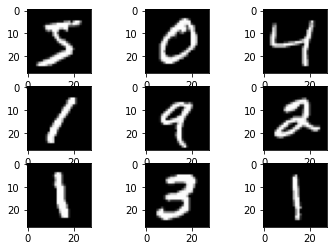

In [4]:
from matplotlib import pyplot
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape the data (flattening)
trainSz = x_train.shape
print(trainSz)
x_train_flat = x_train.reshape(trainSz[0], trainSz[1]*trainSz[2])

testSz = x_test.shape
x_test_flat = x_test.reshape(testSz[0], testSz[1]*testSz[2])

print(x_train.shape, x_test.shape, x_train_flat.shape, x_test_flat.shape)

(60000, 28, 28)
(60000, 28, 28) (10000, 28, 28) (60000, 784) (10000, 784)


In [6]:
y_train = np.where(y_train==3,1,0)
y_test = np.where(y_test==3,1,0)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, x_train_flat, x_val_flat, y_train, y_val = train_test_split(x_train, x_train_flat, y_train, test_size=0.2, random_state=2021)
# Final shape of the data
x_train.shape, x_train_flat.shape, y_train.shape

((48000, 28, 28), (48000, 784), (48000,))

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train_flat, y_train)

LogisticRegression(max_iter=1000)

In [9]:

y_pred_valid_lr = lr.predict(x_train_flat)

y_valid_majority = np.full(y_val.shape, 0)

y_valid_majority

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred_valid_lr)

0.9770833333333333

In [11]:
accuracy_score(y_val, y_valid_majority)

0.8995833333333333

In [12]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_test_flat, y_test)


LogisticRegression(max_iter=1000)

In [13]:
y_pred_test_lr = lr.predict(x_test_flat)


accuracy_score(y_test, y_pred_test_lr)


0.9864

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print("Precision:", precision_score(y_test,y_pred_test_lr))
print("Recall:", recall_score(y_test,y_pred_test_lr))
print("F1 Score:", f1_score(y_test,y_pred_test_lr))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred_test_lr))

Precision: 0.9629237288135594
Recall: 0.9
F1 Score: 0.9303991811668373
Confusion matrix:
 [[8955   35]
 [ 101  909]]


# Neural Networks

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape the data (flattening)
trainSz = x_train.shape
print(trainSz)
x_train_flat = x_train.reshape(trainSz[0], trainSz[1]*trainSz[2])

testSz = x_test.shape
x_test_flat = x_test.reshape(testSz[0], testSz[1]*testSz[2])

print(x_train.shape, x_test.shape, x_train_flat.shape, x_test_flat.shape)

(60000, 28, 28)
(60000, 28, 28) (10000, 28, 28) (60000, 784) (10000, 784)


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [17]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Fit the training data on a Neural Network with 64-32-16 units**

In [18]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_flat.shape[1],), name='hidden_layer1'))
model.add(Dense(32, activation='relu', name='hidden_layer2'))
model.add(Dense(16, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 64)                50240     
                                                                 
 hidden_layer2 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 16)                528       
                                                                 
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


In [19]:

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(x_train_flat, y_train, batch_size=32, epochs=15, 
                    validation_split = 0.2, 
                    verbose=1)

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3445 - accuracy: 0.9006 - val_loss: 0.1722 - val_accuracy: 0.9513
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1538 - accuracy: 0.9549 - val_loss: 0.1403 - val_accuracy: 0.9593
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1124 - accuracy: 0.9673 - val_loss: 0.1257 - val_accuracy: 0.9615
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0891 - accuracy: 0.9728 - val_loss: 0.1047 - val_accuracy: 0.9703
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0716 - accuracy: 0.9786 - val_loss: 0.1081 - val_accuracy: 0.9672
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.1089 - val_accuracy: 0.9682
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0509 - accuracy: 0.9836 - val_loss: 0.1233 - val_accuracy:

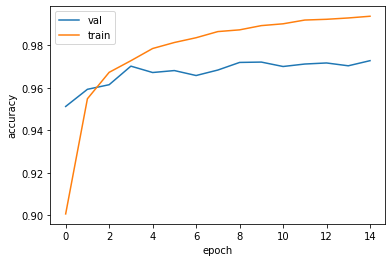

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.plot(history.history["accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val', 'train'], loc='upper left');
plt.show()

In [21]:
hist2 = model.fit(x_train_flat, y_train, batch_size=32, epochs=1, validation_data=(x_val_flat, y_val), 
                    verbose=1) 

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9866 - val_loss: 21.3190 - val_accuracy: 0.1005


In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist3 = model.fit(x_train_flat, y_train, batch_size=32, epochs=2, validation_data=(x_val_flat, y_val),
                    verbose=0)

In [23]:
score = model.evaluate(x_test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09378452599048615
Test accuracy: 0.9776999950408936


In [24]:
y_pred = model.predict(x_test_flat)
y_pred

array([[9.9712433e-11, 5.9690484e-09, 1.3283694e-06, ..., 2.7521964e-15,
        6.6979856e-16, 1.7109005e-14],
       [1.2148496e-11, 4.8927522e-08, 1.0000000e+00, ..., 4.7777885e-27,
        2.4779304e-25, 2.3627499e-28],
       [3.7076606e-11, 9.9995708e-01, 1.8845574e-07, ..., 9.1876056e-17,
        9.1746916e-15, 1.0403066e-15],
       ...,
       [4.4015125e-16, 4.0714448e-10, 2.3091985e-19, ..., 9.6708239e-26,
        9.3736523e-24, 5.0933950e-23],
       [6.5616065e-18, 1.4857020e-11, 1.8894031e-15, ..., 1.2256098e-21,
        1.5266851e-24, 1.2758524e-22],
       [6.2266828e-12, 3.3843842e-14, 4.1737871e-18, ..., 2.4992468e-29,
        4.9458338e-29, 8.4847897e-30]], dtype=float32)

In [25]:
y_pred_ = np.argmax(y_pred, axis = 1)
y_pred_

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_,y_test)

0.9777

In [27]:

print("F1 Score Test:", f1_score(y_test,y_pred_, average='macro'))

F1 Score Test: 0.9775260675509754


In [30]:
print("Recall for Test:", recall_score(y_test,y_pred_, average='macro'))

Recall for Test: 0.9774459936873848


In [31]:
y_pred = model.predict(x_train_flat) 
y_pred_ = np.argmax(y_pred, axis = 1)
print("F1 Score Training:", f1_score(y_train,y_pred_, average='macro'))
print("Recall for Training:", recall_score(y_train,y_pred_, average='macro'))

F1 Score Training: 0.9976855160933829
Recall for Training: 0.9976743447070907


**Fit the training data on a Neural Network with 512-10 units**

In [32]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train_flat.shape[1],), name='hidden_layer1'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(x_train_flat, y_train, batch_size=32, epochs=15, 
                    validation_split = 0.2, 
                    verbose=1)

Epoch 1/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2235 - accuracy: 0.9343 - val_loss: 0.1323 - val_accuracy: 0.9581
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0910 - accuracy: 0.9722 - val_loss: 0.0959 - val_accuracy: 0.9699
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0920 - val_accuracy: 0.9732
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0803 - val_accuracy: 0.9753
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.1034 - val_accuracy: 0.9725
Epoch 6/15
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0854 - val_accuracy: 0.9774
Epoch 7/15
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0898 - val_accuracy:

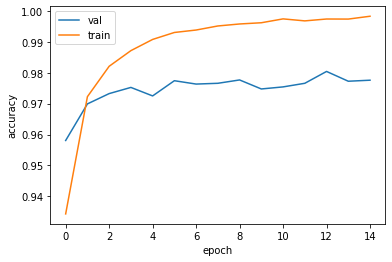

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.plot(history.history["accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val', 'train'], loc='upper left');
plt.show()

In [35]:
hist2 = model.fit(x_train_flat, y_train, batch_size=32, epochs=1, validation_data=(x_val_flat, y_val), 
                    verbose=1) 

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0319 - accuracy: 0.9918 - val_loss: 26.9373 - val_accuracy: 0.0993


In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist3 = model.fit(x_train_flat, y_train, batch_size=32, epochs=2, validation_data=(x_val_flat, y_val),
                    verbose=0)

In [37]:
score = model.evaluate(x_test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0701477900147438
Test accuracy: 0.9843000173568726


In [38]:
y_pred = model.predict(x_test_flat)
y_pred_ = np.argmax(y_pred, axis = 1)
accuracy_score(y_pred_,y_test)

0.9843

In [39]:
print("F1 Score Test:", f1_score(y_test,y_pred_, average='macro'))
print("Recall for Test:", recall_score(y_test,y_pred_, average='macro'))

F1 Score Test: 0.9842167809293733
Recall for Test: 0.9842088413242438


In [41]:
y_pred = model.predict(x_train_flat) 
y_pred_ = np.argmax(y_pred, axis = 1)
print("F1 Score Training:", f1_score(y_train,y_pred_, average='macro'))
print("Recall for Training:", recall_score(y_train,y_pred_, average='macro'))

F1 Score Training: 0.9997025565237656
Recall for Training: 0.9997003500409949


How the performance change did when you changed the layer size, number of units?

When I decreased the layer size and changed the number of units the accuracy score increased. And test loss decreased. 
The second model took more time. 


# Report

In this homework, our aim is predicting digits of the given image with two Machine Learning algorithms, Logistic Regression and Neural Networks. I started with Logistic Regression. First, I load and prepare the data. Then, I plot some samples to see how the numbers looks. After that, I reshape the data of the variables into one dimensional array. Next, I encode the labels according to rule via binary encoding. Before starting the regresison, I also splitted training set to create validation set. After finding the final shape of the data, I started the fit the training data on a Logistic Regression model by using Binary Encoding. As hyperparameters, I used solver='lbfgs', max_iter=1000.

For the training data, accuracy score is 0.9770833333333333.

For the validation data, accuracy score is 0.8995833333333333.

For Test data, I got the below informations.
- Accuracy score 0.9864
- Precision: 0.9629237288135594
- Recall: 0.9
- F1 Score: 0.9303991811668373
- Confusion matrix:
 [[8955   35]
 [ 101  909]]

After that I start to work with Neural Networks. First I again load the data and reshaped the data into a one-dimensional array. I used label encoding to encode the label. I did two different model as indicated in the homework documents. First one with 64-32-16 units in its hidden layers and the second one 512-10 units in its hidden layers. In the first one, I found 

- Test loss: 0.09378452599048615
- Test accuracy: 0.9776999950408936
- F1 Score Test: 0.9775260675509754
- Recall for Test: 0.9774459936873848
- F1 Score Training: 0.9976855160933829
- Recall for Training: 0.9976743447070907

and in the second one I found

- Test loss: 0.0701477900147438
- Test accuracy: 0.9843000173568726
- F1 Score Test: 0.9842167809293733
- Recall for Test: 0.9842088413242438
- F1 Score Training: 0.9997025565237656
- Recall for Training: 0.9997003500409949

which was better estimation. The second one took more time. 

When we look at the speeed of the Logistic Regression and Neural Networks, the training part of the Neural Network took more time than Logistic Regression.
